<a href="https://colab.research.google.com/github/tyrypic/python-pil-labworks/blob/main/variant2_lab5_perlik_k_4_101_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №5: «Операции морфологии при обработке изображений»
**Вариант 2**

**Цель:** Познакомиться с основными операциями математической морфологии из библиотеки OpenCV.

**Задание:**
1. Откройте изображение `Morph.jpg`. Примените дилатацию и эрозию с элементами «крест», «прямоугольник», «эллипс» размером 3×3 и 5×5, и с 1, 3, 5 итерациями. Сохраните и поясните результаты.
2. Сравните результаты операции закрытия (`closing`) с последовательным применением дилатации и эрозии.
3. Сравните результаты операции открытия (`opening`) с последовательным применением эрозии и дилатации.
4. Для всех изображений найдите границы: `boundary(A,B) = A - erode(A,B)` и сохраните результаты для каждого элемента.
5. Подберите элемент, который наилучшим образом сглаживает углы на `morph.bmp` и `morph2.bmp`. Операции и объяснения сохраните.
6. Бинаризуйте `morph3.bmp` порогом, найдите и нарисуйте контуры каждого объекта. Сохраните результаты.
7. Откройте `Fingerprint.jpg` и разработайте последовательность морфологических операций для выделения отпечатка. Сохраните финальный результат.

*Исходные файлы разместите в папке `images/`, результаты генерируйте в `output/`.*

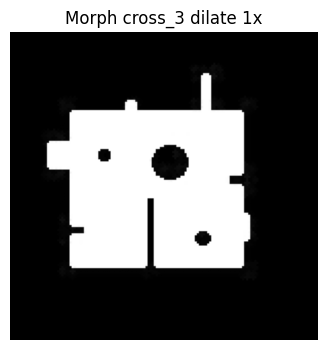

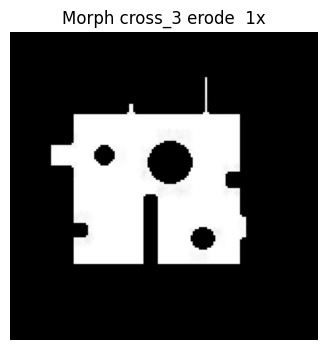

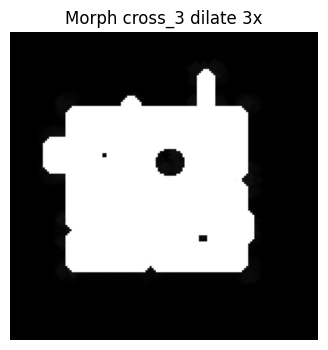

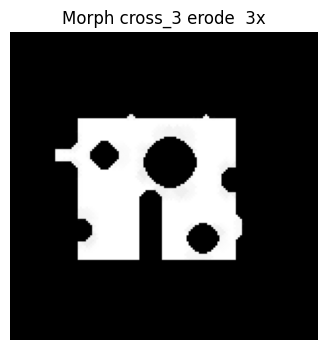

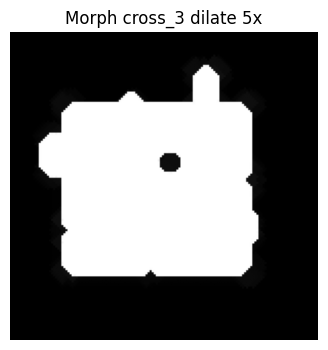

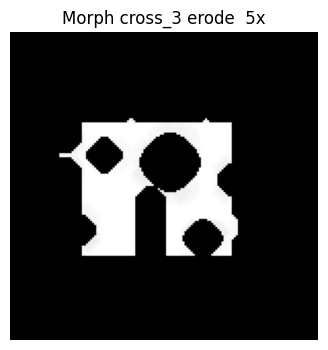

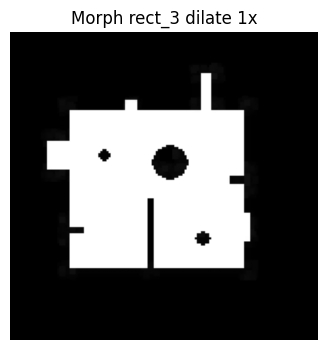

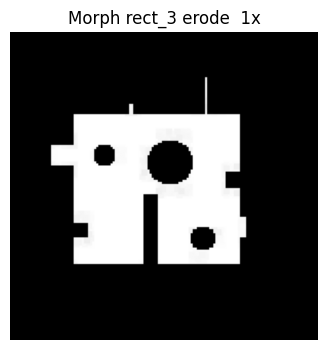

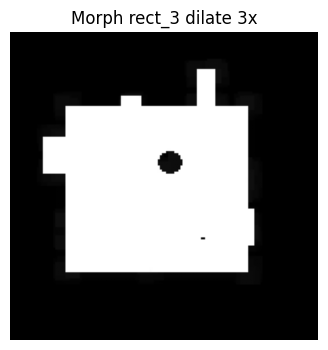

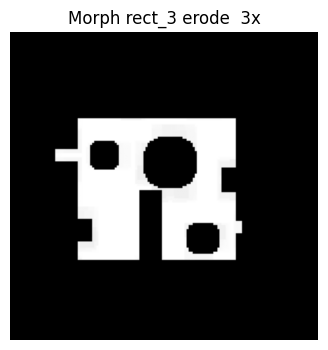

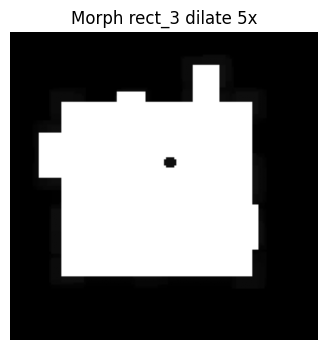

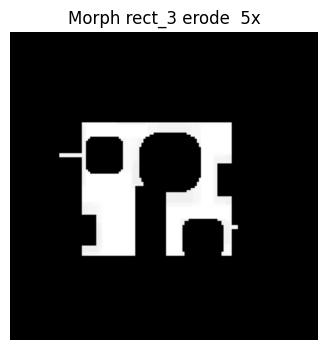

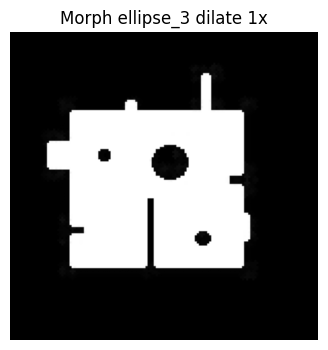

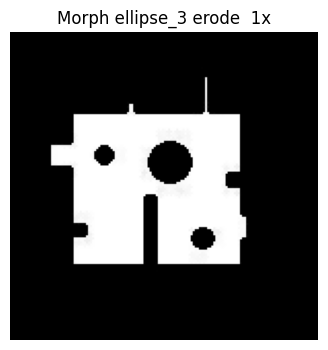

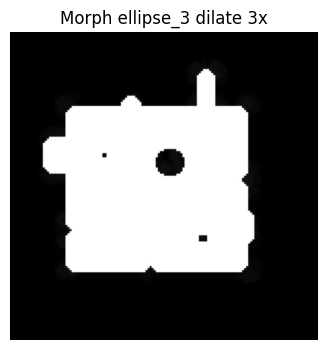

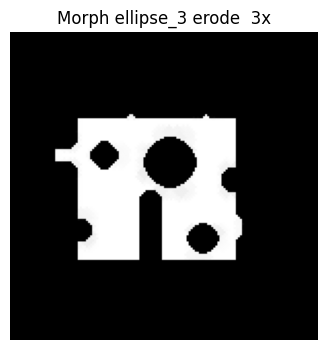

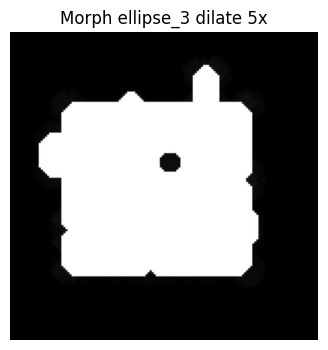

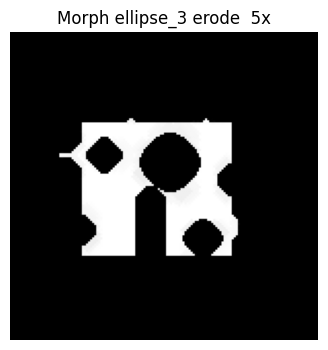

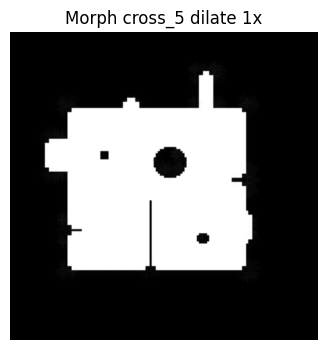

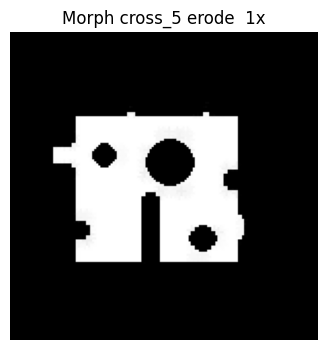

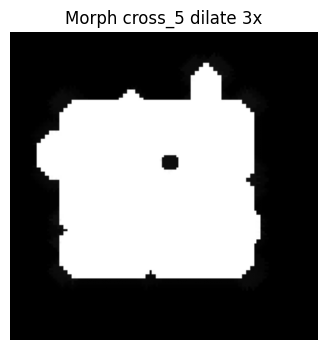

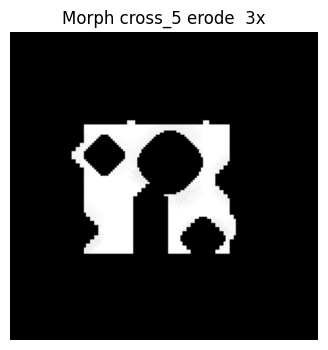

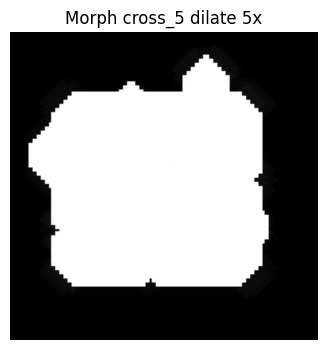

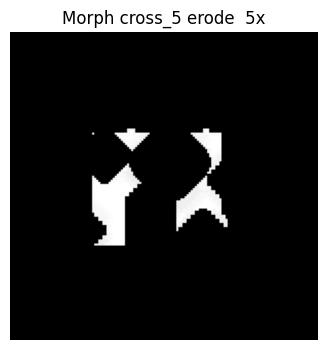

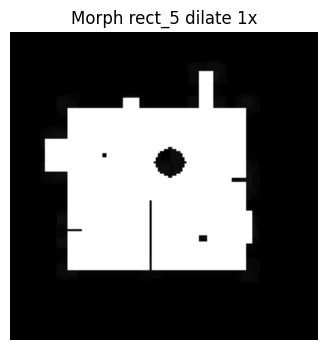

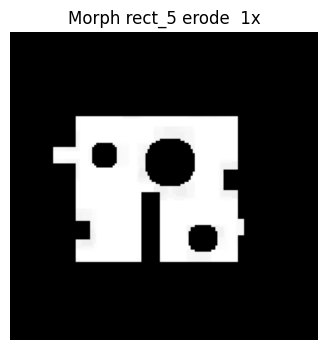

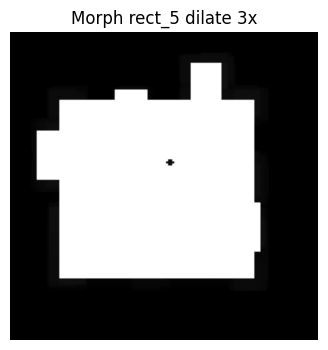

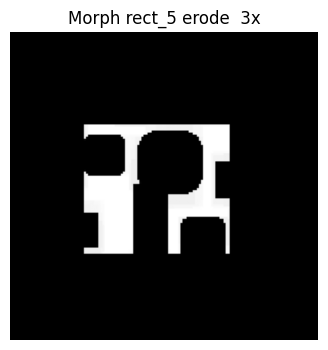

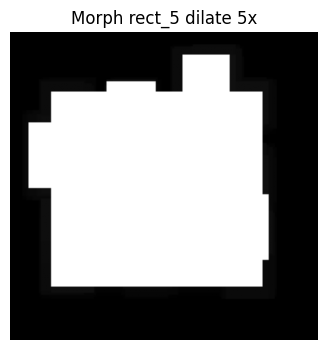

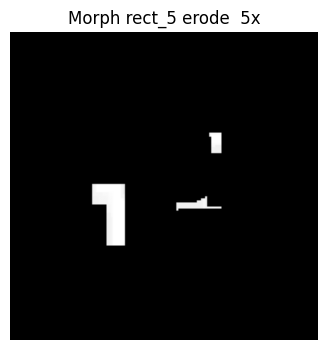

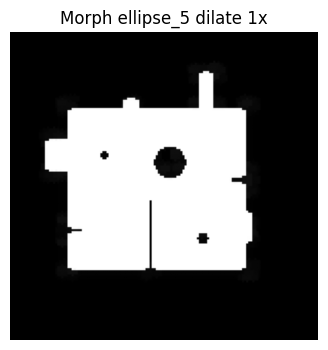

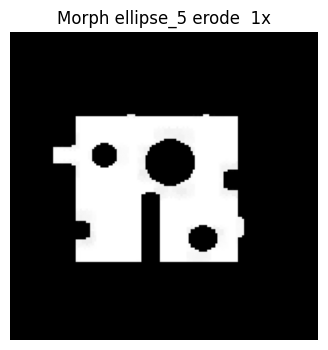

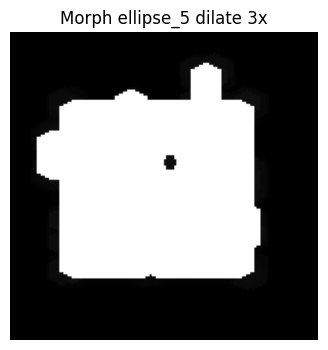

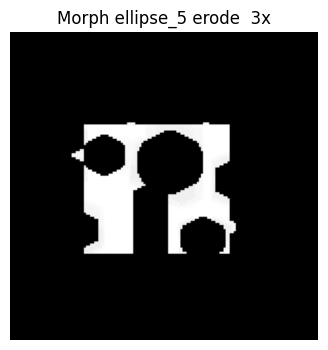

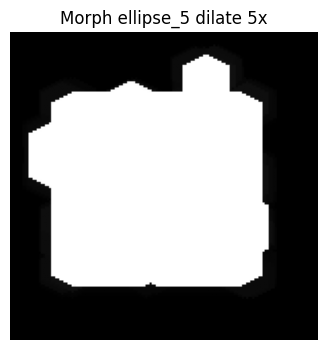

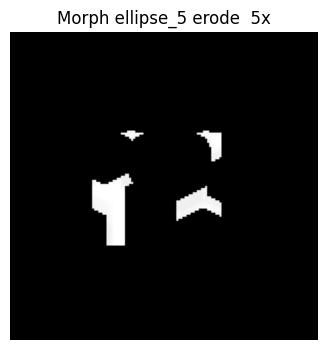

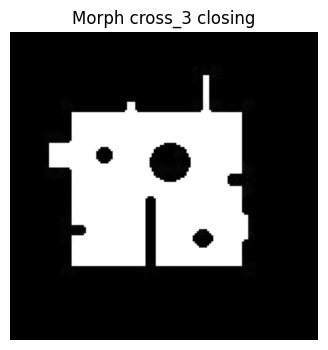

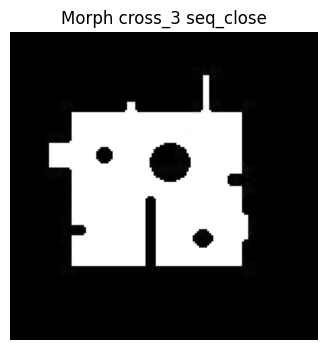

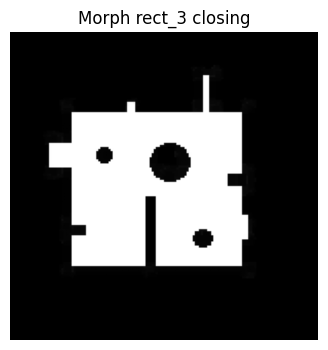

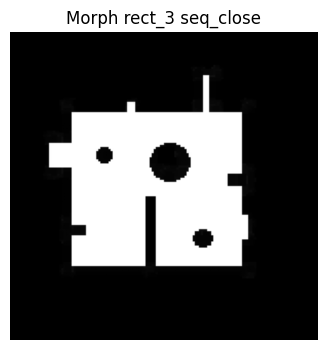

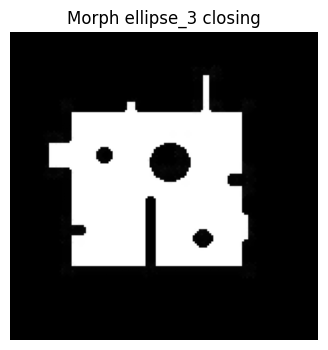

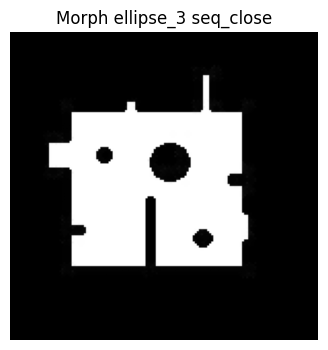

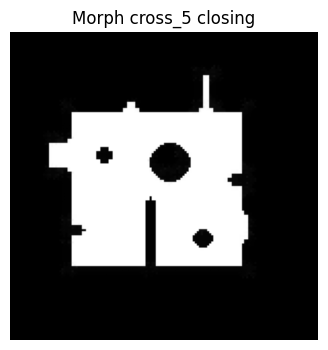

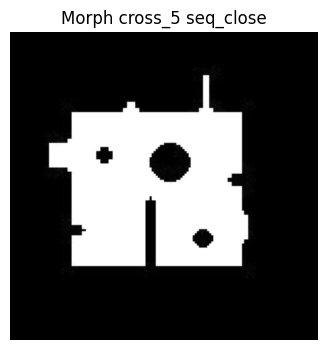

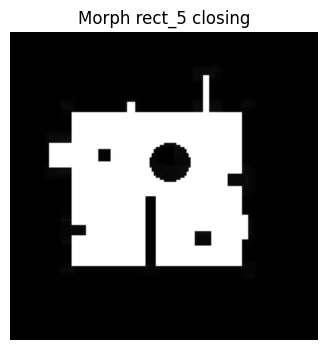

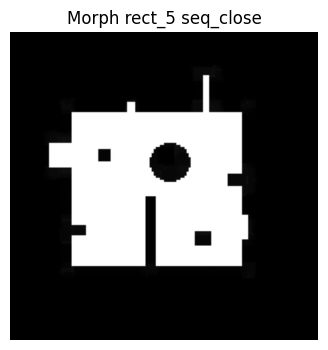

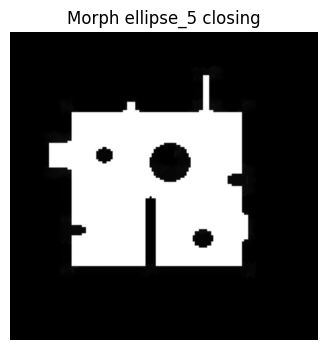

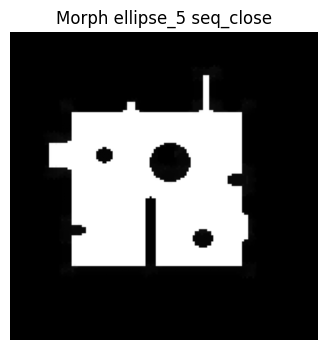

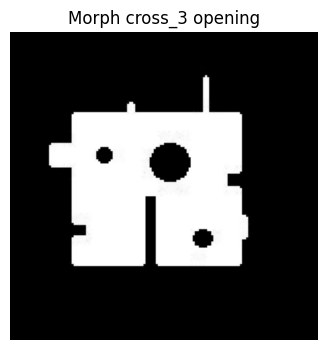

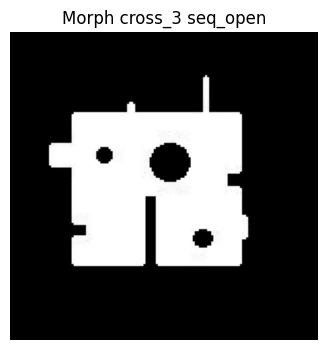

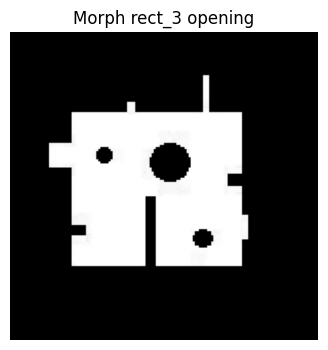

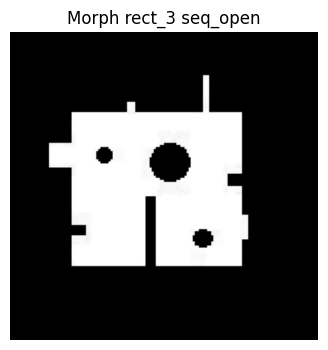

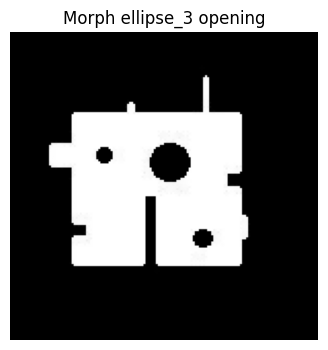

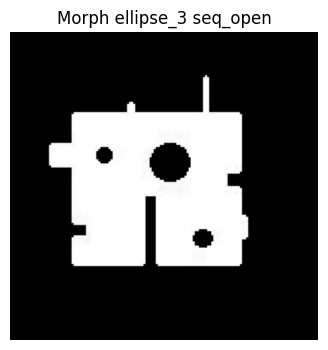

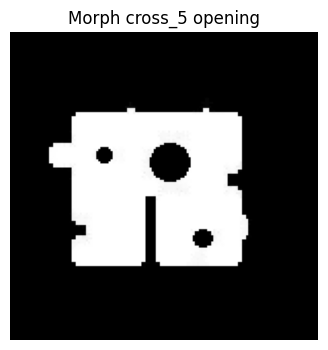

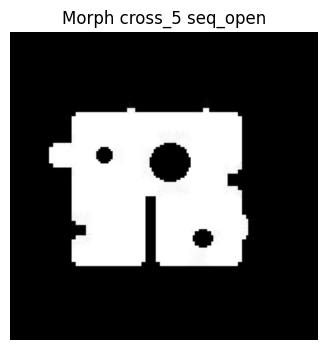

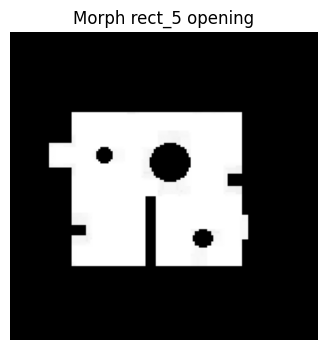

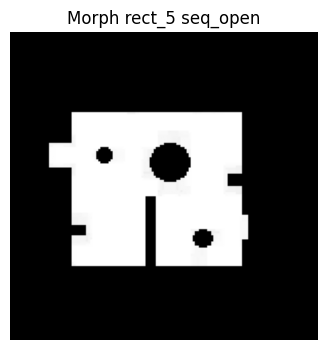

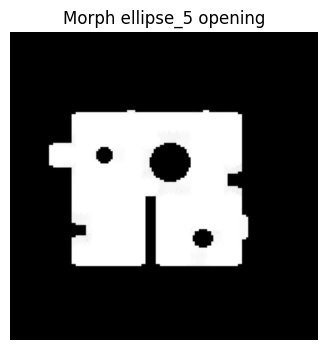

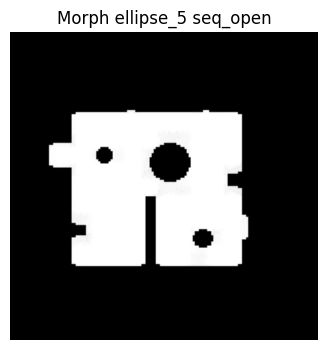

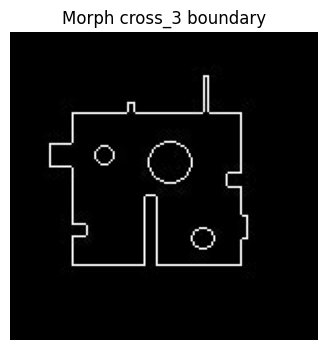

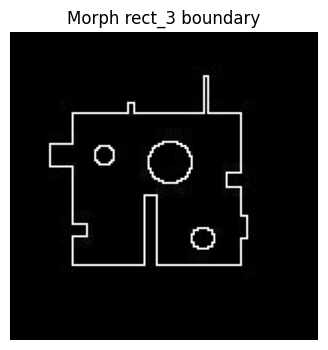

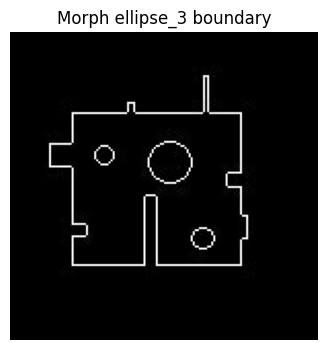

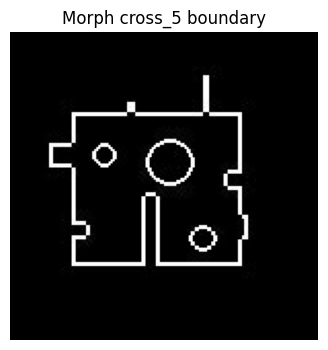

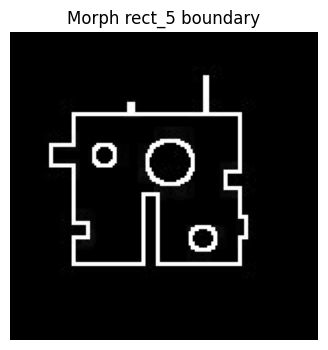

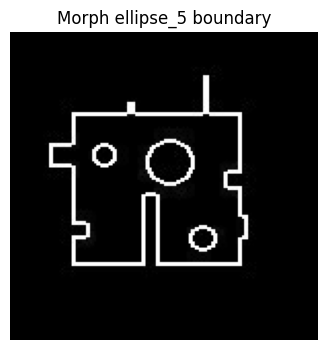

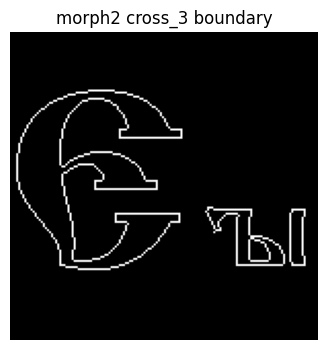

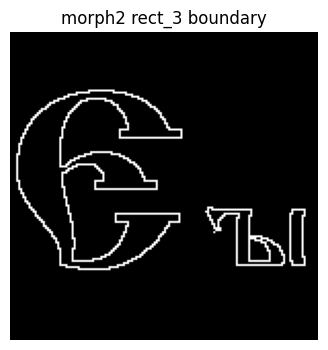

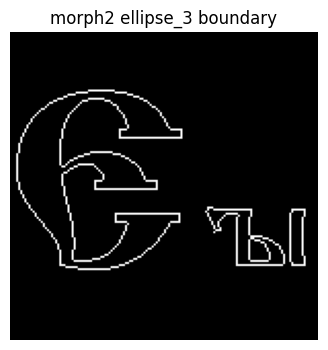

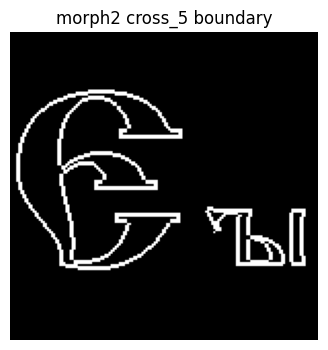

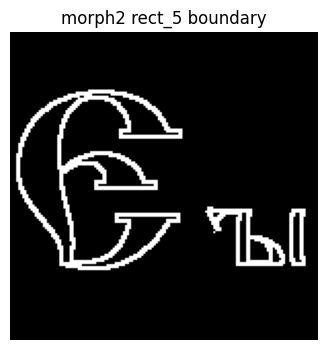

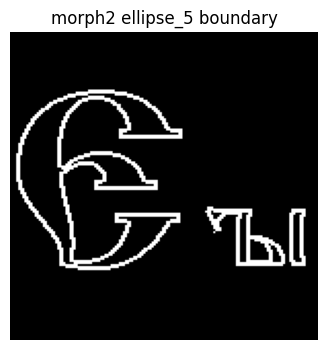

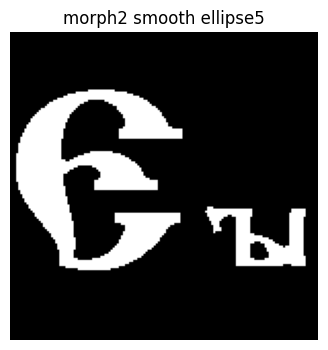

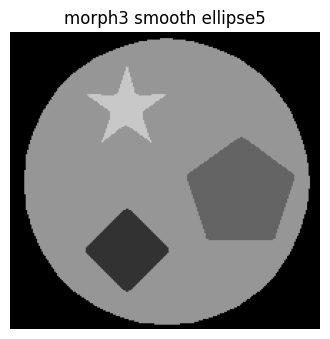

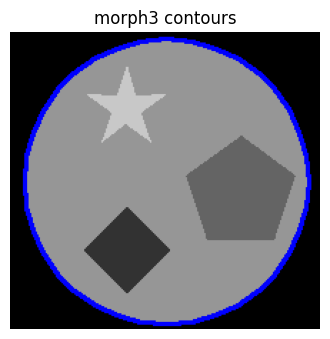

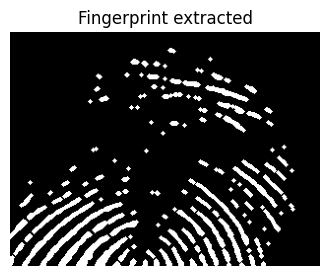

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# --- Настройка директорий ---
image_dir = 'images'
# (output_dir больше не нужен)

# --- Вспомогательная функция загрузки и проверки ---
def load_gray(fname):
    path = os.path.join(image_dir, fname)
    img  = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Не найдено или не удалось загрузить: {path}")
    return img

# --- Функция для отображения ---
def show(img, title, cmap='gray'):
    plt.figure(figsize=(4,4))
    plt.imshow(img, cmap=cmap, vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')
    plt.show()

# --- Загрузка изображений ---
morph   = load_gray('Morph.jpg')
morph2  = load_gray('morph2.bmp')
morph3  = load_gray('morph3.bmp')
finger  = load_gray('Fingerprint.jpg')

# --- Определение структурных элементов ---
elems = {
    'cross_3':   cv2.getStructuringElement(cv2.MORPH_CROSS,   (3,3)),
    'rect_3':    cv2.getStructuringElement(cv2.MORPH_RECT,    (3,3)),
    'ellipse_3': cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)),
    'cross_5':   cv2.getStructuringElement(cv2.MORPH_CROSS,   (5,5)),
    'rect_5':    cv2.getStructuringElement(cv2.MORPH_RECT,    (5,5)),
    'ellipse_5': cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)),
}

# 1. Дилатация и эрозия для Morph.jpg
for name, ker in elems.items():
    for it in (1, 3, 5):
        dil = cv2.dilate(morph, ker, iterations=it)
        ero = cv2.erode(morph,  ker, iterations=it)
        show(dil,  f'Morph {name} dilate {it}x')
        show(ero,  f'Morph {name} erode  {it}x')

# 2. Closing vs последовательность dil->ero
for name, ker in elems.items():
    close_cv  = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, ker)
    seq_close = cv2.erode(cv2.dilate(morph, ker, 1), ker, 1)
    show(close_cv,  f'Morph {name} closing')
    show(seq_close, f'Morph {name} seq_close')

# 3. Opening vs последовательность ero->dil
for name, ker in elems.items():
    open_cv  = cv2.morphologyEx(morph, cv2.MORPH_OPEN, ker)
    seq_open = cv2.dilate(cv2.erode(morph, ker, 1), ker, 1)
    show(open_cv,  f'Morph {name} opening')
    show(seq_open, f'Morph {name} seq_open')

# 4. Границы (boundary = A - erode(A))
boundary_images = {'Morph': morph, 'morph2': morph2}
for tag, img in boundary_images.items():
    for name, ker in elems.items():
        ero      = cv2.erode(img, ker, iterations=1)
        boundary = cv2.subtract(img, ero)
        show(boundary, f'{tag} {name} boundary')

# 5. Сглаживание углов для morph2.bmp и morph3.bmp
smooth2 = cv2.morphologyEx(morph2, cv2.MORPH_CLOSE, elems['ellipse_5'])
smooth3 = cv2.morphologyEx(morph3, cv2.MORPH_CLOSE, elems['ellipse_5'])
show(smooth2, 'morph2 smooth ellipse5')
show(smooth3, 'morph3 smooth ellipse5')

# 6. Бинаризация и контуры для morph3.bmp
_, bw3      = cv2.threshold(morph3, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(bw3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
color       = cv2.cvtColor(morph3, cv2.COLOR_GRAY2BGR)
cv2.drawContours(color, contours, -1, (0,0,255), 2)
show(color, 'morph3 contours', cmap=None)

# 7. Выделение отпечатка пальца из Fingerprint.jpg
blur     = cv2.GaussianBlur(finger, (5,5), 0)
_, bwf   = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY_INV)
kernel   = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
fp_clean = cv2.morphologyEx(bwf, cv2.MORPH_OPEN, kernel, iterations=2)
show(fp_clean, 'Fingerprint extracted')

## Лабораторная № 5: «Математическая морфология»

1. **Дилатация (расширение)**
   Добавляет пиксели на границах объектов по форме структурного элемента. Увеличивает объекты, заполняет мелкие «дырки».

2. **Эрозия (сужение)**
   Убирает пиксели на границах. Сужает объекты, удаляет мелкие шумовые пятна.

3. **Открытие (эрозия→дилатация)**
   Сначала сужает, чтобы убрать мелкие шумовые структуры, затем расширяет обратно. Хорошо удаляет «шум» без значительного изменения формы крупных объектов.

4. **Закрытие (дилатация→эрозия)**
   Сначала расширяет, чтобы заполнить щели и пробелы, затем сужает. Устраняет «дырки» и разрывы.

5. **Границы**
   `boundary = A − erode(A)` выдаёт только крайний контур объекта.

6. **Сглаживание углов**
   Закрытие с круглым (эллипсным) элементом сглаживает зубчатые или заострённые углы, делая контур более плавным.

7. **Выделение отпечатка**
   Комбинация сглаживания, бинаризации и морфологического открытия удаляет шум и оставляет только «рифлёную» структуру отпечатка.